### This Notebook shows how to use the Camera_Calibration_API to calibrate the camera using asymmetrical circular grid pattern

In [1]:
import sys
sys.path.append("../../")
from camera_calibration import Camera_Calibration_API
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

(480, 640)


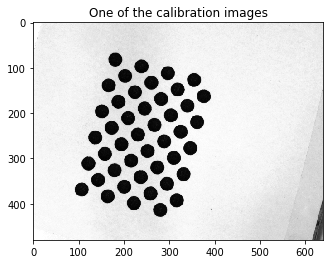

In [2]:
test_img = cv2.imread("../example_images/asymmetric_grid/Image__2018-02-12__15-11-38.png",0)
print(test_img.shape)
plt.imshow(test_img,cmap="gray")
plt.title("One of the calibration images")
plt.show()

##### NOTE:

* Kindly observe the above image. It contains 44 circles. The circles are placed in such a way that if distance between circles 1 and 3 is 10 units then the distance between circles 1 and 2 is 5 units. Thus use `distance_in_world_units` = 10 (Distance between adjacent circles in a row).

* This pattern contains an additional setting called as `double_count_in_column` which is by default set to `True`. But in this case the double count is in rows (there are 11 circles in a row if you include the circles at half the distance between each row Hence the name double count). Be sure to change this to `False`

In [3]:
asymmetric_circles = Camera_Calibration_API(pattern_type="asymmetric_circles",
                                          pattern_rows=11,
                                          pattern_columns=4,
                                          distance_in_world_units = 10,
                                          debug_dir=None)

The Camera Calibration API is initialized and ready for calibration...


In [4]:
asymmetric_circles.double_count_in_column = False # change this since in most cases the double count is in rows

There are 10 asymmetric_circles images given for calibration
Running with 4 threads...
Processing ../example_images/asymmetric_grid/Image__2018-02-12__15-13-40.png
Processing ../example_images/asymmetric_grid/Image__2018-02-12__15-14-01.pngProcessing ../example_images/asymmetric_grid/Image__2018-02-12__15-11-38.pngProcessing ../example_images/asymmetric_grid/Image__2018-02-12__15-14-55.png


Calibration board FOUND
Processing ../example_images/asymmetric_grid/Image__2018-02-12__15-15-21.png
Calibration board FOUND
Processing ../example_images/asymmetric_grid/Image__2018-02-12__15-15-55.png
Calibration board FOUND
Processing ../example_images/asymmetric_grid/Image__2018-02-12__15-16-06.png
Calibration board FOUND
Processing ../example_images/asymmetric_grid/Image__2018-02-12__15-16-18.png
Calibration board FOUND
Processing ../example_images/asymmetric_grid/Image__2018-02-12__15-16-39.png
Calibration board FOUND
Processing ../example_images/asymmetric_grid/Image__2018-02-12__15-17-08.png

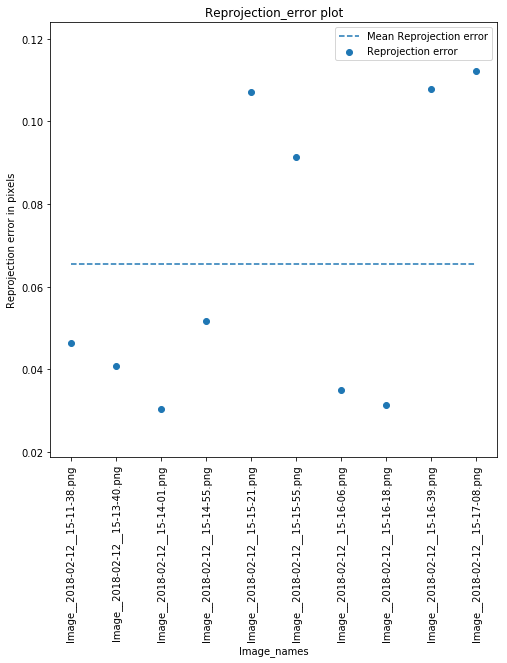

The Mean Reprojection Error in pixels is:  0.06544824551730427


In [5]:
results = asymmetric_circles.calibrate_camera(glob.glob("../example_images/asymmetric_grid/*.png"))

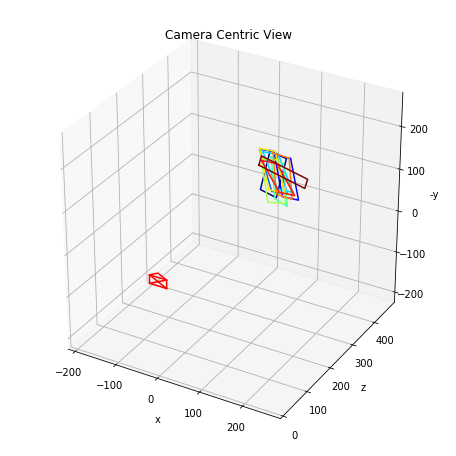

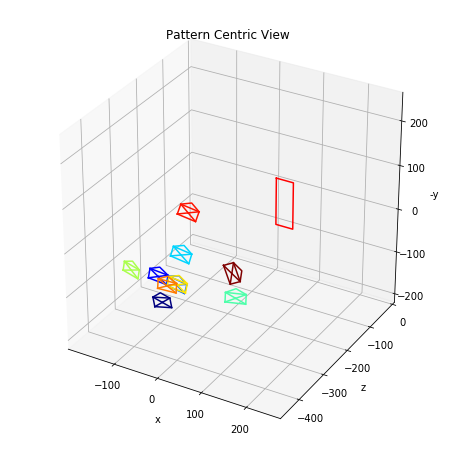

In [6]:
asymmetric_circles.visualize_calibration_boards(20,10)

In [7]:
asymmetric_circles.calibration_df

,image_names,img_points,obj_points,rvecs,tvecs,reprojection_error
0,../example_images/asymmetric_grid/Image__2018-...,"[[[181.3, 82.2641]], [[239.149, 97.1792]], [[2...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[0.0728738472719], [-0.0237305587164], [0.251...","[[0.644092395372], [-85.2893970134], [455.0061...",0.046439
1,../example_images/asymmetric_grid/Image__2018-...,"[[[249.747, 124.824]], [[309.424, 119.482]], [...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[0.178721184078], [0.0279087596603], [-0.0889...","[[11.9663719935], [-77.8411773006], [453.53990...",0.040910
2,../example_images/asymmetric_grid/Image__2018-...,"[[[33.8042, 102.26]], [[92.6371, 91.6227]], [[...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[0.186020806981], [0.0470108621495], [-0.1733...","[[-24.1313566919], [-81.7845657699], [453.3550...",0.030460
3,../example_images/asymmetric_grid/Image__2018-...,"[[[116.554, 70.1391]], [[177.155, 60.1997]], [...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[0.326628574656], [0.0722908318408], [-0.1561...","[[-10.0358655812], [-85.2236458494], [442.2814...",0.051750
4,../example_images/asymmetric_grid/Image__2018-...,"[[[222.59, 128.114]], [[281.21, 126.528]], [[3...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[0.137542672304], [0.354802695009], [0.003875...","[[7.59958756547], [-75.9511346799], [446.45570...",0.107095
5,../example_images/asymmetric_grid/Image__2018-...,"[[[116.367, 145.515]], [[177.041, 140.62]], [[...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[0.110801153701], [-0.198857142863], [-0.1028...","[[-10.0666277011], [-71.1511340498], [434.7762...",0.091315
6,../example_images/asymmetric_grid/Image__2018-...,"[[[34.8096, 82.3334]], [[94.2103, 75.7808]], [...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[0.189696314775], [0.0439007837872], [-0.1043...","[[-23.9609213554], [-85.0631138228], [452.5642...",0.034999
7,../example_images/asymmetric_grid/Image__2018-...,"[[[226.228, 104.691]], [[286.082, 105.274]], [...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[0.156963519862], [0.0559266731703], [0.01342...","[[8.11410245767], [-81.4379959208], [454.68839...",0.031347
8,../example_images/asymmetric_grid/Image__2018-...,"[[[125.418, 163.978]], [[187.565, 155.109]], [...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[0.476390070709], [0.0610343264747], [-0.1385...","[[-8.36182860492], [-68.3480759198], [434.0800...",0.107896
9,../example_images/asymmetric_grid/Image__2018-...,"[[[54.4442, 286.464]], [[76.4287, 231.28]], [[...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[0.38355265972], [0.256799512338], [-1.175801...","[[-20.0229045629], [-49.5857979311], [443.3000...",0.112271
